# _Predictive Analysis using Python_
#### _by Subadarshini Madhanan_

___AIM___

_This project aims to predict the salary of upcoming employees, using the historical data of the company using machine learning regression models._

___STEPS INVOLVED___
- _Importing necessary libraries_
- _Creation of Dataframe and Loading Data_
- _Running EDD on data_
- _Data Pre-processing_
    - _Assigning tiers and cities to colleges and cities respectively_
    - _Creating dummy variables using One-hot Encoding_
    - _Correlation Analysis_
    - _Bi-variate Analysis_
    - _Feature Selection_
    - _Outlier Treatment_
- _Test-Train-Split_
- _Training Models_
    - _Ordinary Least Squares_
    - _Linear Regression_
    - _Ridge Regression_
        - _Validation Curve_
    - _Lasso Regression_
        - _Validation_curve_
    - _Decision Tree Regression_
    - _Bagging Regression_
    - _Random Forest Regression_
        - _GridSearch for Hyperparameter Tuning_
    - _Gradient Boosting Regression_
    - _Ada Boost Regression_
    - _XG Boost Regression_

- _Evaluating the model Performance_

___RESULT___


### Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Creation of Dataframe and Loading Data

In [2]:
df = pd.read_csv("case_study_data.csv",header = 0) #the dataframe df stores the data from case_study_data csv file
colleges = pd.read_csv("Colleges.csv",header = 0) #the dataframe colleges stores the data from Colleges csv file
cities = pd.read_csv("cities.csv",header = 0) #the dataframe cities stores the data from cities csv file

In [3]:
df.head() #this statement helps us in viewing the first five rows of the df data

,College,City,Role,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_in_Months,CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [4]:
colleges.head() #this statement helps us in viewing the first five rows of the colleges data

,Tier1,Tier2,Tier3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
cities.head() #this statement helps us in viewing the first five rows of the cities data

,metro_city,non_metro_cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


### EDD 

In [6]:
df.describe() #running extended data dictionary

,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_in_Months,CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


___Inference___

_From the above Extended Data Dictionary or EDD, we can understand that the mean and median of the variable Previous_CTC is almost the same so, the graph of this variable will be __symmetrical__ about the middle whereas the graph of the variable CTC will be __positively skewed__ because the mean is higher than median. To prove this, I have plotted a histogram with mean and median lines on it._

### Distribution of Previous_CTC

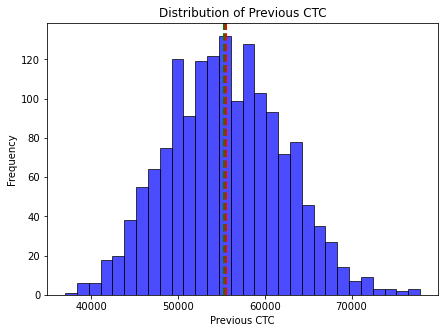

In [7]:
plt.figure(figsize=(7, 5)) # defining the figure size

plt.hist(df.Previous_CTC, bins=30, edgecolor='k', alpha=0.7, color='blue') # Plotting the histogram

plt.axvline(x=np.mean(df.Previous_CTC), color='red', linestyle='dashed', linewidth=2) # plotting the mean line
plt.axvline(x=np.median(df.Previous_CTC), color='green', linestyle='dashed', linewidth=2) # plotting the median line

# defining the axis labels and the title of the graph
plt.xlabel('Previous CTC')
plt.ylabel('Frequency')
plt.title('Distribution of Previous CTC')

plt.show()


### Distribution of CTC

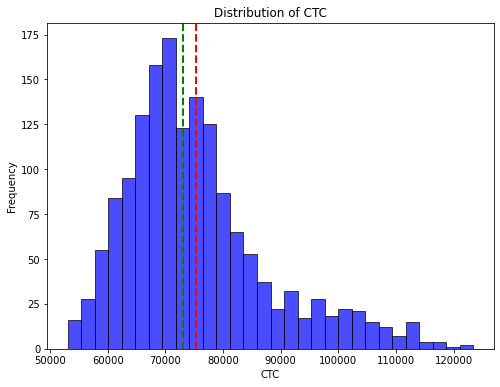

In [8]:
plt.figure(figsize=(8, 6)) # defining the figure size

plt.hist(df.CTC, bins=30, edgecolor='k', alpha=0.7, color='blue') # Plotting the histogram

plt.axvline(x=np.mean(df.CTC), color='red', linestyle='dashed', linewidth=2) # plotting the mean line
plt.axvline(x=np.median(df.CTC), color='green', linestyle='dashed', linewidth=2) # plotting the median line


# defining the axis labels and the title of the graph
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.title('Distribution of CTC')

plt.show()


In [9]:
df.info() #gives us the information about the data such as the count of non-null columns, data types of the columns etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous_CTC         1589 non-null   int64  
 4   Previous_job_change  1589 non-null   int64  
 5   Graduation_Marks     1589 non-null   int64  
 6   EXP_in_Months        1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


__Inference__

From the above information, we can understand that there are no null values in the dataset and there are three features with string datatype - College, City and Role.

In [10]:
df.shape #provides us total number of rows and columns in the dataset

(1589, 8)

# Data Pre-Processing

### Assigning tier to colleges

In [11]:
Tier1 = colleges['Tier1'].tolist() # converting Tier1 column of colleges data into list and storing it in variable Tier1
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [12]:
Tier2 = colleges['Tier2'].tolist() # converting Tier2 column to list and storing it in variable Tier2
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [13]:
Tier3 = colleges['Tier3'].tolist() # converting Tier3 column to list and storing it in variable Tier3
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [14]:
# the function "assign_tier" checks if the value is in list Tier1 or Tier2 or Tier3 and returns the respective Tier names to the
# college names in the College column of df data and if the value is not present in the list, it returns "Unknown"
def assign_tier(college):
    if college in Tier1:
        return "Tier1"
    elif college in Tier2:
        return "Tier2"
    elif college in Tier3:
        return "Tier3"
    else:
        return "Unknown"

In [15]:
df["College"] = df["College"].apply(assign_tier) # apply changes to the college column of df data
df.head()

,College,City,Role,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_in_Months,CTC
0,Tier2,Asansol,Manager,55523,3,66,19,71406.58
1,Tier2,Ajmer,Executive,57081,1,84,18,68005.87
2,Tier3,Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,Tier3,Ajmer,Executive,49010,2,81,33,82092.39
4,Tier1,Durgapur,Executive,57879,4,74,32,73878.10


### Assigning city type - metro / non metro city to cities

In [16]:
metro_city = cities['metro_city'].tolist() 
metro_city # converting metro city column of cities data to list and storing it in variable metro_city

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [17]:
non_metro_city =cities['non_metro_cities'].tolist()
non_metro_city # converting non metro city column of cities data to list and storing it in variable non_metro_city

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer',
 nan]

In [18]:
# the function "assign_city" checks if the city name is present in the metro_city list or non_metro_city list and returns the
# value metro city or non metro city respectively and Unknown if city is not present in either of the lists.
def assign_city(city):
    if city in metro_city:
        return "metro city"
    if city in non_metro_city:
        return "non metro city"
    else:
        return "Unknown"

In [19]:
df['City'] = df['City'].apply(assign_city) # changes are reflected on the df data

In [20]:
df.head(10)

,College,City,Role,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_in_Months,CTC
0,Tier2,non metro city,Manager,55523,3,66,19,71406.58
1,Tier2,non metro city,Executive,57081,1,84,18,68005.87
2,Tier3,non metro city,Executive,60347,2,52,28,76764.02
3,Tier3,non metro city,Executive,49010,2,81,33,82092.39
4,Tier1,non metro city,Executive,57879,4,74,32,73878.10
5,Tier2,non metro city,Executive,54340,4,73,31,59950.89
6,Tier3,metro city,Executive,60298,1,42,46,66602.34
7,Tier2,metro city,Executive,49944,2,56,37,57768.44
8,Tier3,metro city,Executive,53124,4,40,37,70083.30
9,Tier1,non metro city,Executive,51141,1,47,60,85648.48


<AxesSubplot:xlabel='College', ylabel='count'>

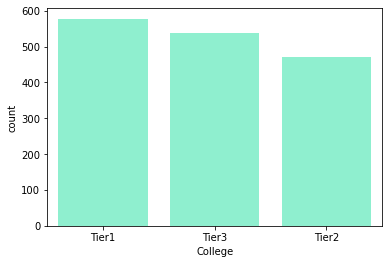

In [21]:
# plotting a countplot of college tiers using seaborn and sorting it in descending order; color of the bar is aquamarine
sns.countplot(x="College",data = df,color="aquamarine",order=df['College'].value_counts().index)

<AxesSubplot:xlabel='Role', ylabel='count'>

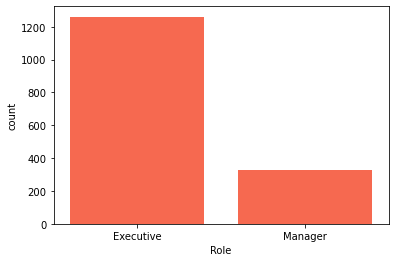

In [22]:
# plotting a countplot of Role and sorting it in descending order; color of the bar is tomato 
sns.countplot(x="Role",data = df,color ="tomato",saturation = 0.9,order=df['Role'].value_counts().index)

<AxesSubplot:xlabel='City', ylabel='count'>

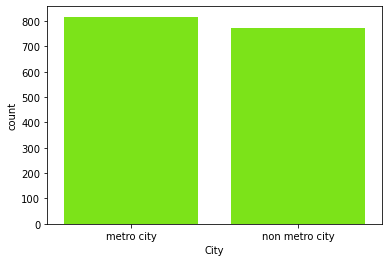

In [23]:
# plotting a countplot of cities and sorting it in descending order; color of the bar is lawngreen
sns.countplot(x="City",data = df,color="lawngreen",saturation = 0.8,order=df['City'].value_counts().index)

### One-hot encoding

In [24]:
# changes categorical features into numerical features; drop_first is used to remove the first column for getting n-1 columns
df = pd.get_dummies(df,drop_first = True) 
df.head()

,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_in_Months,CTC,College_Tier2,College_Tier3,City_non metro city,Role_Manager
0,55523,3,66,19,71406.58,1,0,1,1
1,57081,1,84,18,68005.87,1,0,1,0
2,60347,2,52,28,76764.02,0,1,1,0
3,49010,2,81,33,82092.39,0,1,1,0
4,57879,4,74,32,73878.10,0,0,1,0


# Correlation Analysis

In [25]:
df.corr() # gives a correlation matrix

,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_in_Months,CTC,College_Tier2,College_Tier3,City_non metro city,Role_Manager
Previous_CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.010947,0.042438,-0.004644,0.012321
Previous_job_change,0.005756,1.000000,0.019267,0.023488,0.011370,0.004271,-0.050794,-0.051670,-0.017150
Graduation_Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018419,0.012021,0.018616,0.017858
EXP_in_Months,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.014558,0.017427,0.023613,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,0.012346,-0.032149,0.020365,0.621311
College_Tier2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,1.000000,-0.465741,-0.022917,-0.004865
College_Tier3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.465741,1.000000,0.024288,-0.010706
City_non metro city,-0.004644,-0.051670,0.018616,0.023613,0.020365,-0.022917,0.024288,1.000000,0.048671
Role_Manager,0.012321,-0.017150,0.017858,-0.026751,0.621311,-0.004865,-0.010706,0.048671,1.000000


### _Correlation Matrix Observations:_
- _Previous_job_change feature has no correlation with the dependent variable (CTC) or any other variable in the matrix_
- _Graduation_Marks feature has no correlation with the dependent variable (CTC) or any other variable in the matrix_
- _College_Tier2 and College_Tier3 have no correlation with the dependent variable but they have a weak negative linear_ _correlation between themselves_
- _City_non metro city has no correlation with the dependent variable or any other feature in the matrix_

### Feature Selection

In [26]:
del df['Previous_job_change'] # deleting the previous_job_change feature since it has no correlation with the CTC

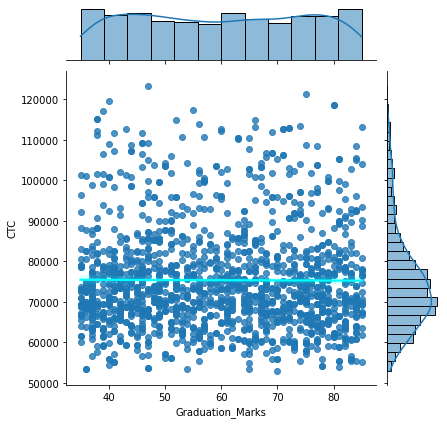

In [27]:
# plotting a jointplot with a regression line of Graduation_Marks(independent variable) and CTC (dependent variable); 
# color of the regression line is cyan
sns.jointplot(x="Graduation_Marks",y="CTC", data = df,kind="reg",joint_kws={'line_kws':{'color':'cyan'}})

In [28]:
del df['Graduation_Marks'] # deleting Graduation_Marks feature since it has no correlation with the CTC

In [29]:
del df['City_non metro city'] # deleting City_non metro city since it has no correlation with the CTC

In [30]:
df.head()

,Previous_CTC,EXP_in_Months,CTC,College_Tier2,College_Tier3,Role_Manager
0,55523,19,71406.58,1,0,1
1,57081,18,68005.87,1,0,0
2,60347,28,76764.02,0,1,0
3,49010,33,82092.39,0,1,0
4,57879,32,73878.10,0,0,0


### Bi-variate Analysis

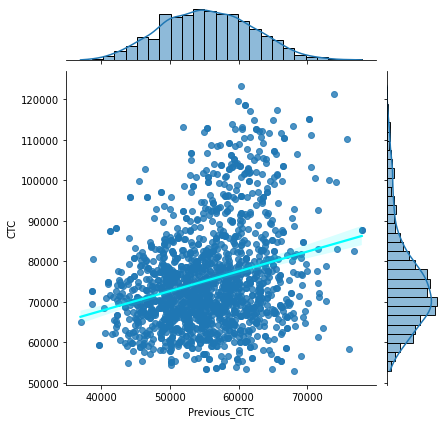

In [31]:
# plotting a jointplot with regression line of Previous_CTC(independent variable) and CTC(dependent variable) using seaborn
sns.jointplot(data = df,x="Previous_CTC",y="CTC",kind="reg",joint_kws={'line_kws':{'color':'cyan'}})

___Inference___

_The feature Previous_CTC has positive linear relationship with CTC. However, there seems to be some outliers._

### Outlier Treatment 

In [32]:
uv = np.percentile(df.Previous_CTC,[99])[0] # finding the 99th percentile value of Previous_CTC feature and storing its 
                                            # first value of the array in the variable uv

df[(df.Previous_CTC > uv)] #checking for values greater than uv

,Previous_CTC,EXP_in_Months,CTC,College_Tier2,College_Tier3,Role_Manager
116,77911,58,87831.62,0,1,0
292,74198,25,99644.51,0,1,1
543,73856,54,121362.73,0,0,1
572,71543,30,61366.78,0,0,0
701,71549,50,83116.21,1,0,0
847,71756,23,72141.43,0,0,0
860,75785,37,110338.25,0,0,1
941,72319,50,63538.43,0,1,0
1024,72661,47,70238.70,0,0,0
1047,73214,22,100119.53,0,0,1


In [33]:
df.Previous_CTC[(df.Previous_CTC > 3 * uv)] = 3 * uv # changing the values greater than uv with 3 * uv

C:\Users\Asus\AppData\Local\Temp/ipykernel_6988/857243736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Previous_CTC[(df.Previous_CTC > 3 * uv)] = 3 * uv # changing the values greater than uv with 3 * uv


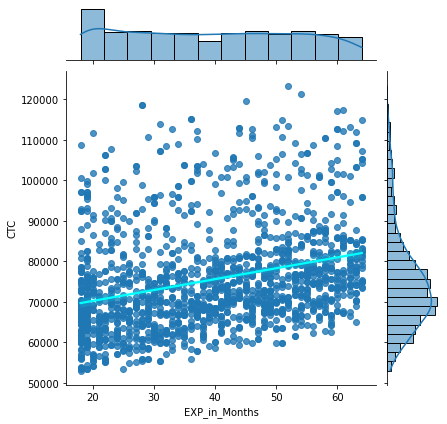

In [34]:
# plotting a jointplot of EXP_in_Months (independent variable) and CTC (dependent variable) using seaborn
sns.jointplot(x="EXP_in_Months",y="CTC",data = df,kind="reg",joint_kws={'line_kws':{'color':'cyan'}})

___Inference___

_The feature EXP_in_Months has a positive linear relationship with the response variable CTC._

In [35]:
uv2 = np.percentile(df.EXP_in_Months,[99])[0] # finding the 99th percentile of the feature and storing its first value of the 
                                              # array in variable uv2

df[(df.EXP_in_Months > uv2)] # checking for values greater than uv2

,Previous_CTC,EXP_in_Months,CTC,College_Tier2,College_Tier3,Role_Manager


___Inference___

_There are no outliers in the graph._

# x - y split

In [36]:
# importing necessary libraries for train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
x = df.drop("CTC",axis =1) # x stores all the independent features of df except CTC (dependent variable)
y = df['CTC'] # y stores the dependent variable - CTC

# Test-train split

In [38]:
# splitting 80% data for training and 20% of data for testing 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1271, 5) (318, 5) (1271,) (318,)


In [39]:
lm_a = LinearRegression() # creating a Linear Regression model
lm_a.fit(x_train,y_train) # fitting that model in the x and y train

LinearRegression()

In [40]:
y_test_a = lm_a.predict(x_test) # predicting the y test values using x test values
y_train_a = lm_a.predict(x_train) # predicting the y train values using x train values

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
r2_score(y_test,y_test_a) # checking the coefficient of determination for actual test values and predicted test values

0.5435909819770008

In [43]:
r2_score(y_train,y_train_a) # checking the coefficient of determination for actual train values and predicted train values

0.5319900699039323

<a id="OLS"></a>
# Ordinary Least Squares

In [44]:
import statsmodels.api as sn

In [45]:
x_cons = sn.add_constant(x) # adding a constant to x variable
x_cons

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Previous_CTC,EXP_in_Months,College_Tier2,College_Tier3,Role_Manager
0,1.0,55523,19,1,0,1
1,1.0,57081,18,1,0,0
2,1.0,60347,28,0,1,0
3,1.0,49010,33,0,1,0
4,1.0,57879,32,0,0,0
...,...,...,...,...,...,...
1584,1.0,61285,60,0,0,0
1585,1.0,63140,24,0,0,0
1586,1.0,44907,19,0,0,0
1587,1.0,52054,29,0,0,0


In [46]:
lr = sn.OLS(y,x_cons).fit() # fitting the linear regression model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     363.4
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          1.12e-259
Time:                        13:07:52   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1583   BIC:                         3.334e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.865e+04   1872.115     20.645      0.000     3.5e+04    4.23e+04
Previous_CTC      0.4105      0.033     12.553      0.000       0.346       0.475
EXP_in_Months   261.1523     15.418     16.938      0.000     230.910     291.395
College_Tier2   123.5148    533.762      0.231      0.817    -923.441    1170.470
College_Tier3 -1001.2015    515.629     -1.942      0.052   -2012.588      10.185
Role_Manager   1.947e+04    533.522     36.484      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.590   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.017
Skew:                           0.409   Prob(JB):                     1.13e-12
Kurtosis:                       3.403   Cond. No.                     4.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

___Inference___
- _r2 : 0.534_
- _Previous_CTC, EXP_in_Months and Role_Manager have a significant relationship with the response variable_

<a id="LR"></a>
# Linear Regression 

In [47]:
lrsk = LinearRegression() # creating a linear regression model using sklearn
lrsk.fit(x,y) # fitting the model in x and y 
print(lrsk.intercept_) # finding the value beta naught or intercept

38650.16689557767


In [48]:
print(lrsk.coef_) # finding the model coefficients

[ 4.10520037e-01  2.61152332e+02  1.23514796e+02 -1.00120147e+03
  1.94652010e+04]


In [49]:
lrsk.predict(x) # predicting salary values

array([85994.08102159, 66907.31791869, 69734.88341692, ...,
       62047.28452085, 67592.79454831, 81147.41987267])

<a id="RR"></a>
# Ridge Regression

In [50]:
from sklearn import preprocessing

In [51]:
scaler = preprocessing.StandardScaler().fit(x_train) # creating a scaler variable to regularize/standardize the data

In [52]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [53]:
from sklearn.linear_model import Ridge

In [54]:
rr = Ridge(alpha = 0.5) # defining lambda/alpha value
rr.fit(x_train_s,y_train) # fitting the model in x and y trained data

Ridge(alpha=0.5)

In [55]:
print("The coefficient of determination of test set is: ", r2_score(y_test,rr.predict(x_test_s)))

The coefficient of determination of test set is:  0.5435728275013263


### Validation curve
_For finding the optimum model from different values of alpha_

In [56]:
from sklearn.model_selection import validation_curve

In [57]:
param_range = np.logspace(-2,8,100) # creating different alpha/lambda values - 10^-2 to 10^8
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [58]:
# finding the train and test scores for different values of alpha
train_scores, test_scores = validation_curve(Ridge(),x_train_s,y_train,"alpha",param_range,scoring ='r2')

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.7223

In [59]:
print(train_scores)
print(test_scores)

[[5.24911932e-01 5.30958339e-01 5.39144639e-01 5.35925225e-01
  5.30591727e-01]
 [5.24911932e-01 5.30958339e-01 5.39144639e-01 5.35925225e-01
  5.30591727e-01]
 [5.24911932e-01 5.30958338e-01 5.39144639e-01 5.35925225e-01
  5.30591727e-01]
 [5.24911932e-01 5.30958338e-01 5.39144639e-01 5.35925225e-01
  5.30591727e-01]
 [5.24911932e-01 5.30958338e-01 5.39144639e-01 5.35925225e-01
  5.30591726e-01]
 [5.24911932e-01 5.30958338e-01 5.39144638e-01 5.35925225e-01
  5.30591726e-01]
 [5.24911932e-01 5.30958338e-01 5.39144638e-01 5.35925225e-01
  5.30591726e-01]
 [5.24911931e-01 5.30958337e-01 5.39144638e-01 5.35925224e-01
  5.30591725e-01]
 [5.24911930e-01 5.30958337e-01 5.39144637e-01 5.35925223e-01
  5.30591725e-01]
 [5.24911929e-01 5.30958336e-01 5.39144636e-01 5.35925222e-01
  5.30591723e-01]
 [5.24911927e-01 5.30958334e-01 5.39144634e-01 5.35925220e-01
  5.30591721e-01]
 [5.24911924e-01 5.30958331e-01 5.39144631e-01 5.35925217e-01
  5.30591718e-01]
 [5.24911919e-01 5.30958327e-01 5.391446

In [60]:
train_mean = np.mean(train_scores,axis =1) # finding the mean values of the train scores
test_mean = np.mean(test_scores,axis =1) # finding the mean values of the test scores

In [61]:
max(test_mean) # finding the maximum mean value from the mean values 

0.5260267688414653

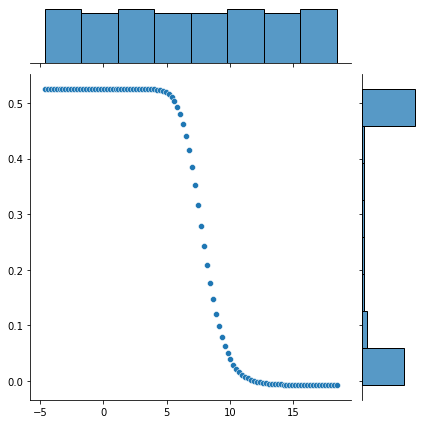

In [62]:
sns.jointplot(x = np.log(param_range),y =test_mean) # plotting an alpha value graph

In [63]:
np.where (test_mean == max(test_mean)) # finding the location of the maximum mean value

(array([26], dtype=int64),)

In [64]:
param_range[26] # finding its lambda/alpha value

4.229242874389499

In [65]:
rr_best = Ridge(alpha = param_range[26]) # storing the lambda value in variable rr_best
rr_best.fit(x_train_s,y_train) # fitting the model in scaler x and y train 

Ridge(alpha=4.229242874389499)

## Evaluating model performance

In [66]:
print("The coefficient of determination of test set is: ",r2_score(y_test,rr_best.predict(x_test_s)))


The coefficient of determination of test set is:  0.5434332971814033


In [67]:
print("The coefficient of determination of train set is: ",r2_score(y_train,rr_best.predict(x_train_s)))

The coefficient of determination of train set is:  0.5319846159373727


In [68]:
print("The mean squared error of Ridge Regression is: ",mean_squared_error(y_test,rr.predict(x_test_s))) 

The mean squared error of Ridge Regression is:  67726677.4362715


<a id="LaR"></a>
# Lasso Regression

In [69]:
from sklearn.linear_model import Lasso

In [70]:
lar = Lasso(alpha = 0.3) # creating a lasso model with lambda value 0.3
lar.fit(x_train_s,y_train) # fitting the model in x and y train 
r2_score(y_test,lar.predict(x_test_s)) # finding the r2 value of actual and predicted scaler test values

0.5435891124437362

In [71]:
param_range # re-using the 100 alpha values for finding the best model for different values of alpha

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

### Validation Curve

_For finding best model for different values of alpha_

In [72]:
train_scores_lasso,test_scores_lasso = validation_curve(Lasso(),x_train_s,y_train,"alpha",param_range,scoring='r2')

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.7223

In [73]:
print(train_scores_lasso)
print(test_scores_lasso)

[[0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592523 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592522 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592522 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592522 0.53059173]
 [0.52491193 0.53095834 0.53914464 0.53592522 0.53059172]
 [0.52491193 0.53095834 0.53914464 0.53592522 0.53059172]
 [0.52491193 0.53095833 0.53914463 0.53592522 0.53059172]
 [0.52491193 0

In [74]:
train_mean_lasso = np.mean(train_scores_lasso,axis =1) # finding the mean values of the train values 
test_mean_lasso = np.mean(test_scores_lasso,axis =1) # finding the mean values of the test values

In [75]:
train_mean_lasso

array([0.53230637, 0.53230637, 0.53230637, 0.53230637, 0.53230637,
       0.53230637, 0.53230637, 0.53230637, 0.53230637, 0.53230637,
       0.53230637, 0.53230637, 0.53230637, 0.53230637, 0.53230637,
       0.53230637, 0.53230637, 0.53230636, 0.53230636, 0.53230635,
       0.53230634, 0.53230632, 0.53230629, 0.53230624, 0.53230617,
       0.53230605, 0.53230585, 0.53230554, 0.53230505, 0.53230426,
       0.53230302, 0.53230103, 0.53229787, 0.53229284, 0.53228482,
       0.53227217, 0.53225336, 0.53222534, 0.53218072, 0.53210967,
       0.53199826, 0.53182268, 0.53154718, 0.53110852, 0.53041206,
       0.52939312, 0.52794646, 0.52577648, 0.52245597, 0.51744466,
       0.50946523, 0.49675975, 0.47652898, 0.44431586, 0.39302354,
       0.31754415, 0.25034069, 0.17442286, 0.05354021, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
test_mean_lasso

array([ 0.52601718,  0.52601719,  0.5260172 ,  0.52601722,  0.52601724,
        0.5260172 ,  0.52601724,  0.52601728,  0.52601733,  0.5260174 ,
        0.52601748,  0.52601759,  0.52601772,  0.52601789,  0.5260181 ,
        0.52601837,  0.5260187 ,  0.52601913,  0.52601966,  0.52602033,
        0.52602121,  0.52602227,  0.52602361,  0.52602526,  0.52602735,
        0.52602998,  0.52603324,  0.52603744,  0.52604247,  0.52604855,
        0.52605608,  0.52606519,  0.52607602,  0.52608864,  0.52610284,
        0.52611954,  0.52612998,  0.5261246 ,  0.52610829,  0.5260726 ,
        0.52600611,  0.525886  ,  0.52567492,  0.52531584,  0.52472734,
        0.52393005,  0.52285196,  0.52107777,  0.51805289,  0.51295572,
        0.50484981,  0.49195588,  0.4714413 ,  0.43879683,  0.38684361,
        0.31093844,  0.24408762,  0.16752816,  0.04556648, -0.00747667,
       -0.00747667, -0.00747667, -0.00747667, -0.00747667, -0.00747667,
       -0.00747667, -0.00747667, -0.00747667, -0.00747667, -0.00

In [77]:
max(test_mean_lasso) # finding the maximum mean value

0.526129983497629

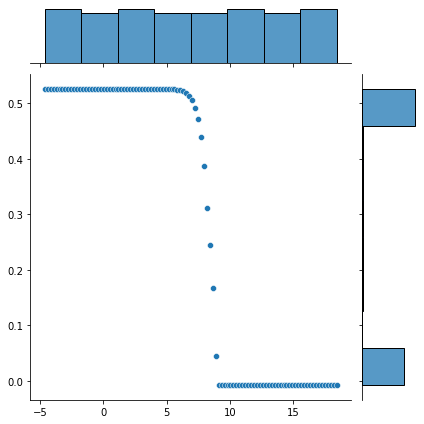

In [78]:
sns.jointplot(x=np.log(param_range),y=test_mean_lasso) # alpha graph

In [79]:
np.where(test_mean_lasso == max(test_mean_lasso)) # finding the location of the maximum mean value

(array([36], dtype=int64),)

In [80]:
print("the best alpha value is: ", param_range[36]) # finding its lambda value


the best alpha value is:  43.28761281083057


In [81]:
lar_best = Lasso(alpha = param_range[36]) # creating a model for finding the best model for the above alpha value

In [82]:
lar_best.fit(x_train_s,y_train) # fitting the model

Lasso(alpha=43.28761281083057)

## Evaluating model performance

In [83]:
print("The coefficient of determination of test set is: ",r2_score(y_test,lar_best.predict(x_test_s))) 

The coefficient of determination of test set is:  0.5432736835028129


In [84]:
print("The coefficient of determination of trains set is: ",r2_score(y_train,lar_best.predict(x_train_s)))

The coefficient of determination of trains set is:  0.531940946847618


In [85]:
print("The mean squared error of Lasso Regression is: ",mean_squared_error(y_test,lar.predict(x_test_s)))

The mean squared error of Lasso Regression is:  67724261.00467382


<a id="DT"></a>
# Decision Tree Regression

In [86]:
from sklearn import tree
# creating a decision tree regressor model with maximum number of levels = 3, minimum observations at internal node = 40 and 
# minimum number of observations at leaf node = 25 - for pruning the tree 
regtree = tree.DecisionTreeRegressor(max_depth = 3,min_samples_leaf=25,min_samples_split=40)  
regtree.fit(x_train,y_train) # fitting the tree model in x and y train

DecisionTreeRegressor(max_depth=3, min_samples_leaf=25, min_samples_split=40)

In [87]:
y_train_pred = regtree.predict(x_train) # predicting y train values
y_test_pred = regtree.predict(x_test) # predicting y test values

In [88]:
dot_data = tree.export_graphviz(regtree,out_file =None) # creating a graph visualization

In [89]:
from IPython.display import Image

In [90]:
import pydotplus

In [91]:
graph = pydotplus.graph_from_dot_data(dot_data) # plotting the graph using pydotplus

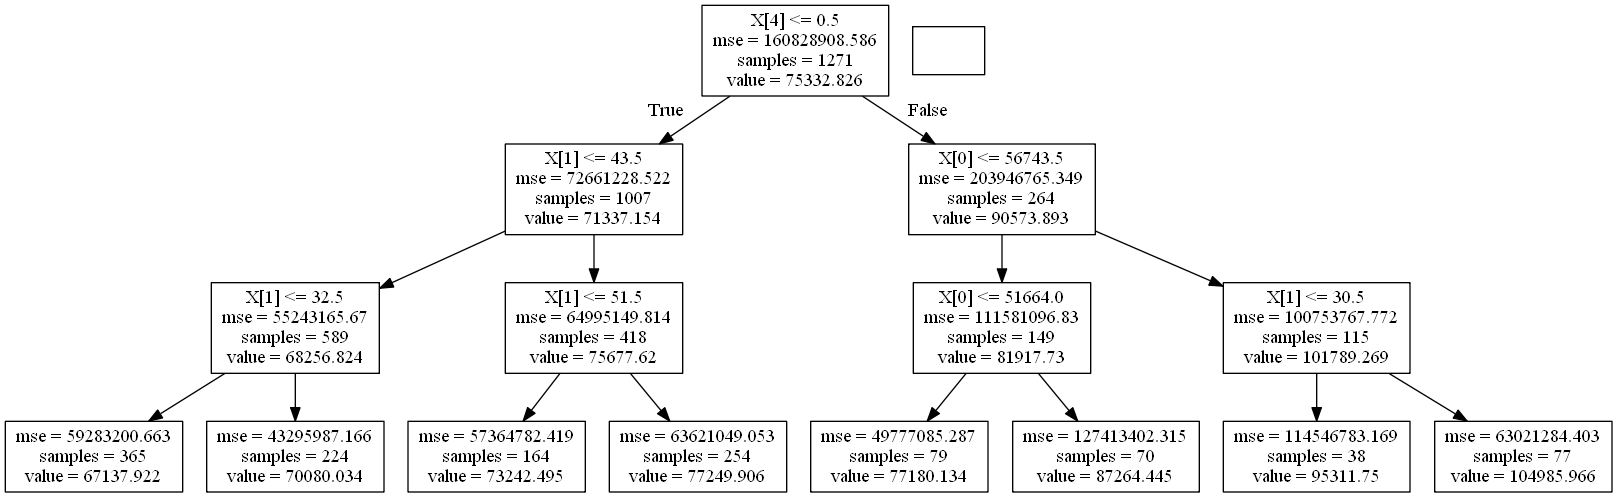

In [92]:
Image(graph.create_png()) # creating and depicting the image of the decision tree regressor graph

## Evaluating model performance

In [93]:
mean_squared_error(y_test,y_test_pred) # MSE of Decision Tree Regressor 

60424631.026134804

In [94]:
print("The coefficient of determination is: ", r2_score(y_train,y_train_pred)) # r2 for actual and predicted train values

The coefficient of determination is:  0.6137194061789908


In [95]:
print("the coefficient of determination is: ",r2_score(y_test,y_test_pred)) # r2 for actual and predicted test values

the coefficient of determination is:  0.5927831611924907


<a id="BR"></a>
# Bagging Regression

In [96]:
base_tree = tree.DecisionTreeRegressor() # creating a base decision tree regressor model

In [97]:
from sklearn.ensemble import BaggingRegressor

In [98]:
# creating a Bagging Regressor model 
bag_reg = BaggingRegressor(base_estimator=base_tree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)


In [99]:
bag_reg.fit(x_train, y_train) # fitting the model

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=42)

In [100]:
bag_reg_pred = bag_reg.predict(x_test) # making predictions on the test set

In [101]:
bag_reg_pred

array([ 64953.46765,  70234.96994,  71776.76966,  78938.46054,
        72084.08331,  87928.11178,  68681.75525,  74221.4861 ,
        61961.09151,  79199.93548,  71735.84758,  75644.00939,
        91865.98716,  77679.20362,  71597.1704 , 100032.85879,
        68198.8346 ,  66227.04967,  68789.80532,  81339.6209 ,
        95968.0042 , 104981.80772,  69322.56052,  69853.0279 ,
        69459.98693,  71999.1929 ,  71077.7141 , 101465.09439,
        72945.06229,  71646.9845 ,  64952.81868,  61201.78925,
        80197.27821,  82326.14476, 102540.64956,  89091.85493,
        65374.42254,  73600.8875 ,  68858.89379,  74051.31345,
        72622.39737,  73671.64838,  71757.72311,  64568.72879,
        76154.53724,  69379.57771,  73438.55983,  66133.61507,
        67634.57764,  71541.20382, 110900.23651,  76612.19128,
        99483.33526,  79813.4926 ,  95154.27262,  68077.55652,
        70355.06864,  76251.4028 ,  73264.02549,  65989.80963,
        74729.25789,  78184.69925,  68056.20857,  62204

## Evaluating model performance


In [102]:
print("The Mean Squared Error of Bagging Regressor model is: ",mean_squared_error(y_test,bag_reg_pred)) 

The Mean Squared Error of Bagging Regressor model is:  53085490.99802305


In [103]:
print("The coefficient of determination of train set is: ", r2_score(y_train,bag_reg.predict(x_train)))

The coefficient of determination of train set is:  0.9462239933968265


In [104]:
print("The coefficient of determination of test set is: ", r2_score(y_test,bag_reg_pred))

The coefficient of determination of test set is:  0.6422434781370938


<a id="RFR"></a>
# Random Forest Regression

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1 ,random_state=42) # creating Random Forest Regressor model

In [107]:
rf_reg.fit(x_train, y_train) # fitting the model

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [108]:
rf_reg_pred = rf_reg.predict(x_test) # making predictions on the test set

In [109]:
rf_reg_pred

array([ 65023.28537,  70069.19313,  71709.85435,  79023.29062,
        72094.35158,  87679.28546,  68706.519  ,  74207.47537,
        61847.60182,  79058.45273,  71626.83586,  75725.82687,
        91736.70045,  77656.81772,  71679.69731, 100106.1903 ,
        68223.66327,  66286.6649 ,  68799.96568,  81330.63055,
        95934.56356, 105151.51943,  69297.6045 ,  69658.00188,
        69310.96578,  72016.7147 ,  71040.10945, 101452.92173,
        73006.85271,  71539.4709 ,  65018.62211,  61314.81332,
        79992.1378 ,  82298.47276, 102375.86981,  89019.68055,
        65239.90401,  73468.74908,  68810.62604,  74091.17374,
        72312.09485,  73626.82823,  71715.659  ,  64557.51144,
        76117.96639,  69274.332  ,  73418.38445,  65971.21953,
        67509.15677,  71528.73815, 110949.10657,  76562.47435,
        99331.68408,  79817.3838 ,  95122.19197,  67988.02834,
        70612.46165,  76179.0403 ,  73283.99701,  65901.97976,
        74829.99742,  78311.37648,  68120.30157,  62296

## Evaluating model performance


In [110]:
print("The mean squared error of Random Forest Regressor is: ", mean_squared_error(y_test,rf_reg_pred))

The mean squared error of Random Forest Regressor is:  53200710.02528733


In [111]:
print("The coefficient of determination of test set is: ",r2_score(y_test,rf_reg_pred))

The coefficient of determination of test set is:  0.6414669880327067


In [112]:
print("The coefficient of detemination of train set is: ",r2_score(y_train,rf_reg.predict(x_train)))

The coefficient of detemination of train set is:  0.9462277280802285


## Hyperparameter Tuning 

To enhance the performance of the model, we can use GridSearch to find the best hyperparameters that would give us the best models for predicting salary

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
rf_reg_h = RandomForestRegressor(random_state=0) # creating a random forest regressor model for hyperparameter tuning

In [115]:
# defining a grid of different hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [116]:
grid_search = GridSearchCV(rf_reg_h, param_grid,scoring='r2') # perform grid search
grid_search.fit(x_train, y_train) # fit the model

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [117]:
best_params = grid_search.best_params_ # finding the best parameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [118]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test) # predicting values using best model

In [119]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficient of determination for test set:",r2_score(y_test,y_pred))
print("Coefficient of determination of train set:",r2_score(y_train,best_model.predict(x_train)))

Mean Squared Error: 54299252.79604656
Coefficient of determination for test set: 0.6340636310438997
Coefficient of determination of train set: 0.8373572827759908


<a id="GB"></a>
# Gradient Boosting Regression

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

In [121]:
# creating a gradient boosting regressor model
gb_reg = GradientBoostingRegressor(learning_rate =0.1, n_estimators =1000, max_depth = 3) 
gb_reg.fit(x_train, y_train) # fitting the model

GradientBoostingRegressor(n_estimators=1000)

In [122]:
gb_reg_pred = gb_reg.predict(x_test) # making predictions on the test set

In [123]:
gb_reg_pred 

array([ 69098.33181513,  65257.80573562,  71255.4049407 ,  79597.04767106,
        80654.01892203,  85992.85423812,  67165.17647578,  69804.43734831,
        61262.4020872 ,  73145.07184457,  71888.84277174,  78842.85905992,
        88980.06998281,  73914.82719526,  71515.88276048,  99972.82152991,
        66336.76852626,  69192.35052892,  69399.58730101,  85154.35243294,
        98766.09572386, 104775.36936108,  69350.04526142,  67907.64587956,
        79532.24268264,  68900.74396378,  71120.32067256, 103377.29118934,
        72087.97142465,  75436.58247929,  79555.33989297,  62190.41817449,
        77761.56094392,  84218.98843563, 105031.76225583,  74525.09758439,
        64963.22671077,  69197.35832987,  67928.41683416,  70257.18700659,
        73412.4881112 ,  72038.68972321,  73196.89391216,  63952.40133205,
        75671.0283738 ,  71781.81811165,  76039.52570271,  64306.326003  ,
        73337.93818333,  71422.87059176, 112657.45093279,  74640.6995943 ,
        98866.97893594,  

## Evaluating model performance

In [124]:
print("The mean squared error of Gradient Boosting Regressor model is: ",mean_squared_error(y_test,gb_reg_pred))

The mean squared error of Gradient Boosting Regressor model is:  62504487.48523211


In [125]:
print("The coefficient of determination of test set is: ",r2_score(y_test,gb_reg_pred))

The coefficient of determination of test set is:  0.5787664835882758


In [126]:
print("The coefficient of determination of train set is: ",r2_score(y_train,gb_reg.predict(x_train)))

The coefficient of determination of train set is:  0.9352109039296997


<a id="ADA"></a>
# Ada Boost Regression

In [127]:
from sklearn.ensemble import AdaBoostRegressor

In [128]:
ada_reg = AdaBoostRegressor(learning_rate =0.02, n_estimators =4000) # creating a Ada Boost Regressor model

In [129]:
ada_reg.fit(x_train, y_train) # fit the model on x and y train

AdaBoostRegressor(learning_rate=0.02, n_estimators=4000)

In [130]:
ada_reg_pred = ada_reg.predict(x_test) # predicting test set values

In [131]:
ada_reg_train_pred = ada_reg.predict(x_train) # predicting train set values

In [132]:
ada_reg_pred

array([ 75076.15931217,  68263.16168421,  68557.30170825,  77243.55466667,
        74599.40641221,  87873.1454067 ,  70637.64340517,  75411.61925824,
        70132.19182777,  75491.7092233 ,  70446.53472663,  78662.938625  ,
        88787.61371681,  77779.9098155 ,  76119.18314815, 103818.56220339,
        68758.74084746,  69007.02633947,  69007.02633947,  78819.29106299,
        91173.70972973, 104326.56222222,  68929.89997821,  68929.89997821,
        70585.61207229,  68601.76300546,  78202.20215447, 104227.04120482,
        77243.55466667,  75971.70875622,  68350.47925156,  68350.47925156,
        78643.71922222,  78847.56255814,  93260.14396552,  78757.84809917,
        68911.68418182,  77922.12242105,  72102.753875  ,  68551.95954839,
        71567.33235294,  78579.36073684,  71188.19854369,  68305.31140351,
        78236.80135593,  72976.08825581,  79271.55061069,  69050.84712788,
        68501.79723404,  74512.5528    , 102562.66285714,  76791.80305785,
       103763.322     ,  

In [133]:
ada_reg_train_pred

array([106583.81720588,  70337.48901442,  78166.36697917, ...,
        70313.19475225,  68265.69270872,  69318.14886525])

## Evaluating model performance

In [134]:
print("The mean squared error of Ada Boost Regressor is: ",mean_squared_error(y_test,ada_reg_pred))

The mean squared error of Ada Boost Regressor is:  59611331.47824032


In [135]:
print("The coefficient of determination of test set is: ",r2_score(y_test,ada_reg_pred))

The coefficient of determination of test set is:  0.5982641921110565


In [136]:
print("The coefficient of determination of train set is: ",r2_score(y_train,ada_reg_train_pred))

The coefficient of determination of train set is:  0.622356643995644


<a id="XGB"></a>
# XG Boost Regression

In [137]:
import xgboost as xgb

In [138]:
# creating a XG Boost Regressor model
xgb_reg = xgb.XGBRegressor(max_depth=5, n_estimators=10000, learning_rate=0.2,
                            n_jobs=-1)

In [139]:
xgb_reg.fit(x_train, y_train) # fitting the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [140]:
xgb_reg_pred = xgb_reg.predict(x_test) # making predictions on the test set
xgb_reg_pred

array([ 63632.26 ,  65022.55 ,  72564.18 ,  82101.92 ,  82741.97 ,
        87618.81 ,  64824.297,  74358.664,  63903.55 ,  75448.445,
        65925.69 ,  77682.17 ,  93410.78 ,  74109.77 ,  71168.4  ,
        99528.266,  69607.055,  71037.92 ,  71576.445,  85054.5  ,
        97205.53 , 108318.49 ,  72862.16 ,  65590.45 ,  82890.55 ,
        74544.52 ,  64320.688, 101234.94 ,  76221.31 ,  71366.32 ,
        73177.18 ,  63809.16 ,  81443.2  ,  86946.625, 103617.14 ,
        79424.086,  66962.234,  71738.73 ,  68810.13 ,  70375.516,
        75802.29 ,  67512.37 ,  70818.766,  62499.91 ,  75312.31 ,
        67888.47 ,  80085.09 ,  61266.805,  75944.49 ,  73279.664,
       118651.93 ,  69333.61 ,  99794.43 ,  91784.43 ,  92391.734,
        70115.33 ,  68998.33 ,  70353.11 ,  70560.766,  69822.766,
        70703.76 ,  79031.11 ,  67038.016,  59950.777,  58763.145,
        72706.01 ,  69998.02 ,  59422.234, 103807.   ,  69509.84 ,
        73932.77 ,  70607.05 ,  69453.1  ,  69327.78 ,  78037.

## Evaluating model performance

In [141]:
print("The mean squared error of XG Boost Regressor model is: ",mean_squared_error(y_test,xgb_reg_pred))

The mean squared error of XG Boost Regressor model is:  65914488.902487054


In [142]:
print("The coefficient of determination of test set is: ",r2_score(y_test,xgb_reg_pred))

The coefficient of determination of test set is:  0.5557856234012588


In [143]:
print("The coefficient of determination of train set is: ",r2_score(y_train,xgb_reg.predict(x_train)))

The coefficient of determination of train set is:  0.9999999999315217


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

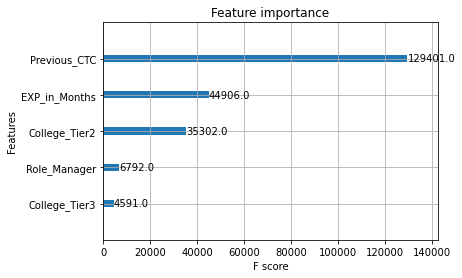

In [144]:
xgb.plot_importance(xgb_reg) # plotting feature importance graph

<a id="res"></a>
# Result

_After training all the models, the Bagging Regression model is the best model for predicting the salary of upcoming employees because it has the highest r2_score for both test and train set and it has the lowest Mean Squared Error value when compared to other models._

- _Linear, Ridge and Lasso Regression - These models' performance on predicting the salary was average._

- _Decision Tree Regression - The performance of this model was better than that of Linear, Ridge and Lasso but not as good as Ensemble Techniques._

- _Bagging and Random Forest Regressor provided almost the same best performance on both train and test data but the MSE of Bagging Regression was lower than that of Random Forest, thus, making it the best choice._

- _Gradient, Ada and XG Boosting models performed excellent (>0.85) on train set but comparatively low on test set._